In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import CleaningCars as hf
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [2]:
def load_data():    
    csv_path = os.path.join('data', 'vehicles.csv')
    return pd.read_csv(csv_path)

df = load_data()

In [5]:
df = hf.ultimateClean(df)

In [6]:
import gc
gc.collect()

133

In [5]:
df.shape

(160443, 75)

In [6]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'type', 'description', 'lat', 'long',
       'posting_date', 'color_black', 'color_other', 'color_silver',
       'color_white', 'drive_4wd', 'drive_fwd', 'drive_other', 'drive_rwd',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co',
       'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa'

In [7]:
df = hf.TF_IDF(df, number = 100)

(160443, 100)


In [10]:
df.shape

(160443, 175)

In [11]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,type,description,...,90,91,92,93,94,95,96,97,98,99
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,Carvana is the safer way to buy a car During t...,...,0.0,0.14268,0.000000,0.000000,0.0,0.080105,0.083687,0.000000,0.035139,0.068192
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,sedan,I'll move to another city and try to sell my c...,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,SUV,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,...,0.0,0.00000,0.213436,0.000000,0.0,0.159036,0.000000,0.000000,0.000000,0.000000
3,2000,1974.0,chevrolet,good,4 cylinders,gas,190000.0,clean,pickup,1974 chev. truck (LONG BED) NEW starter front ...,...,0.0,0.00000,0.000000,0.857383,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,19500,2005.0,ford,excellent,8 cylinders,diesel,116000.0,lien,pickup,2005 Ford F350 Lariat (Bullet Proofed). This t...,...,0.0,0.00000,0.000000,0.936639,0.0,0.000000,0.000000,0.095059,0.000000,0.000000


In [12]:
df = df.drop(["manufacturer", "condition", "cylinders", "fuel", "title_status", "type", "description", "posting_date"], axis = 1)

In [13]:
df.head()

,price,year,odometer,lat,long,color_black,color_other,color_silver,color_white,drive_4wd,...,90,91,92,93,94,95,96,97,98,99
0,35990,2010.0,32742.0,32.590000,-85.480000,0,1,0,0,0,...,0.0,0.14268,0.000000,0.000000,0.0,0.080105,0.083687,0.000000,0.035139,0.068192
1,7500,2014.0,93600.0,32.547500,-85.468200,0,1,0,0,0,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,4900,2006.0,87046.0,32.616807,-85.464149,0,1,0,0,1,...,0.0,0.00000,0.213436,0.000000,0.0,0.159036,0.000000,0.000000,0.000000,0.000000
3,2000,1974.0,190000.0,32.861600,-85.216100,0,1,0,0,0,...,0.0,0.00000,0.000000,0.857383,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,19500,2005.0,116000.0,32.547500,-85.468200,0,1,0,0,1,...,0.0,0.00000,0.000000,0.936639,0.0,0.000000,0.000000,0.095059,0.000000,0.000000


# SAVING TO PICKLE

In [14]:
if input("You sure? ") == "yes":
    df.to_pickle("data/processedDF.pkl")  # where to save it, usually as a .pkl
    print("SAVED!")

You sure?  yes


SAVED!


# LOADING

In [69]:
if input("Load? ") == "yes":
    df = pd.read_pickle("data/processedDF.pkl")
    print("Loaded!")


Load?  yes


Loaded!


In [70]:
df

,price,year,odometer,lat,long,color_black,color_other,color_silver,color_white,drive_4wd,...,90,91,92,93,94,95,96,97,98,99
0,35990,2010.0,32742.0,32.590000,-85.480000,0,1,0,0,0,...,0.0,0.14268,0.000000,0.000000,0.000000,0.080105,0.083687,0.000000,0.035139,0.068192
1,7500,2014.0,93600.0,32.547500,-85.468200,0,1,0,0,0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4900,2006.0,87046.0,32.616807,-85.464149,0,1,0,0,1,...,0.0,0.00000,0.213436,0.000000,0.000000,0.159036,0.000000,0.000000,0.000000,0.000000
3,2000,1974.0,190000.0,32.861600,-85.216100,0,1,0,0,0,...,0.0,0.00000,0.000000,0.857383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,19500,2005.0,116000.0,32.547500,-85.468200,0,1,0,0,1,...,0.0,0.00000,0.000000,0.936639,0.000000,0.000000,0.000000,0.095059,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160438,5300,2013.0,140000.0,44.823200,-89.166500,0,1,0,0,0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
160439,14995,2014.0,83790.0,44.408867,-89.881210,0,0,1,0,1,...,0.0,0.00000,0.000000,0.000000,0.313002,0.000000,0.000000,0.489216,0.000000,0.000000
160440,17895,2018.0,31888.0,44.408867,-89.882240,0,0,0,1,1,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
160441,17900,2014.0,53000.0,44.784900,-106.964800,1,0,0,0,1,...,0.0,0.00000,0.000000,0.000000,0.524153,0.000000,0.000000,0.000000,0.000000,0.000000


## Normalising and choosing features

In [71]:
df= hf.normalise(df)

In [72]:
price = df.pop("price")

In [73]:
price = price.values

In [76]:
from sklearn.linear_model import lasso_path

In [77]:
alphas_lasso, coefs_lasso, _ = lasso_path(df, price, fit_intercept=False)

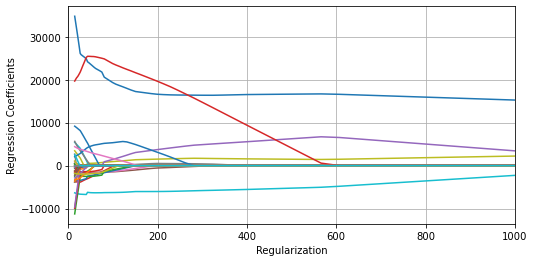

In [79]:
fig, ax = plt.subplots(figsize = (8,4))
for i in range(100):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")
    ax.set_xlim(0, 1000)

In [88]:
clf = linear_model.Lasso(alpha=10)

In [89]:
clf.fit(df, price)

Lasso(alpha=10)

In [90]:
mean_squared_error(price, clf.predict(df))

62483821.27073211

In [91]:
sum(clf.coef_ != 0)

83

In [92]:
np.where(clf.coef_ != 0)[0]

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  16,  19,  20,  28,  30,  42,  46,  49,  50,  57,  60,  62,
        65,  67,  69,  70,  71,  72,  73,  74,  75,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  90,  91,  93,  95,  96,  98,
        99, 102, 103, 106, 107, 109, 110, 113, 115, 116, 117, 119, 120,
       122, 123, 126, 132, 135, 138, 140, 141, 145, 146, 147, 148, 150,
       154, 156, 159, 160, 164], dtype=int64)

In [93]:
df.columns[np.where(clf.coef_ != 0)[0]]

Index([                  'year',                    'lat',
                         'long',            'color_black',
                  'color_other',           'color_silver',
                  'color_white',              'drive_4wd',
                    'drive_fwd',            'drive_other',
                    'drive_rwd', 'transmission_automatic',
          'transmission_manual',               'state_ak',
                     'state_al',               'state_ca',
                     'state_co',               'state_id',
                     'state_in',               'state_nc',
                     'state_nj',               'state_ny',
                     'state_oh',               'state_tn',
                     'state_va',               'state_wa',
                     'state_wy',                        1,
                              3,                        4,
                              5,                        6,
                              7,                        

In [94]:
df = df[df.columns[np.where(clf.coef_ != 0)[0]]]

In [95]:
mod = sm.OLS(price, df)
#mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

# p-values is the probability of rejection of the null hypotheses
# the null hypothesis is the hypothesis that the two variables are not related
# we look for the parameters with less than 0.05 p value, 95% confidence that these are related to the target

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     2549.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:47:50   Log-Likelihood:            -1.6665e+06
No. Observations:              160443   AIC:                         3.333e+06
Df Residuals:                  160361   BIC:                         3.334e+06
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                    4.48

In [96]:
a = res.summary()

In [97]:
pval = pd.DataFrame(res.pvalues)

In [99]:
pval.loc[pval[0] < 0.05]

,0
year,0.000000e+00
lat,9.758475e-12
long,2.817030e-63
color_black,0.000000e+00
color_other,0.000000e+00
...,...
88,2.059995e-106
90,2.535221e-89
93,0.000000e+00
94,3.503946e-30


## Simple linear model

In [100]:
data = df.values

In [101]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size=0.20, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5625509424235958

(0.0, 100.0)

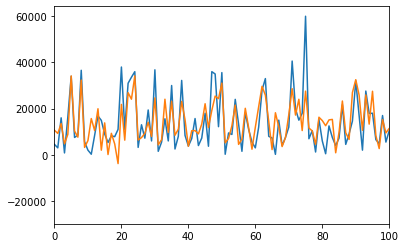

In [108]:
plt.plot(y_test)
plt.plot(reg.predict(X_test))
plt.xlim(0, 100)